<a href="https://colab.research.google.com/github/Lucas-GStark/ML-Neural-Networks/blob/main/Reinforcement%20Learning_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
env = gym.make("FrozenLake-v0") # Initialize the FrozenLake environment

In [ ]:
states = env.observation_space.n
actions = env.action_space.n

Q = np.zeros((states, actions)) # Create a matrix with all 0 values, where Q is the Q-Matrix

render = True

epochs = 1000 # Number of times that the environment will be executed
max_steps = 100 # Maximum number of steps allowed in each execution

alpha = 0.81 # The Learning-Rate that 
gamma = 0.96 # The Discount-Factor

epsilon = 0.9 # Every time an action is takes, there is 90% that it is random and 10% hte action is based on the Q-Matrix values

In [ ]:
rewards = []
for episode in range(epochs):

  state = env.reset()
  for _ in range(max_steps):
    
    if render:
      env.render()

    # Picking an action
    if np.random.uniform(0,1) < epsilon: # np.random.uniform(0,1) picks a random value between 0, 1 
      action = env.action_space.sample() # Takes a random action
    else:
      action = np.argmax(Q[state,:]) # Use the Q-Matrix to pick the highest value (best action)

    new_state, reward, done, info = env.step(action) # Take the random action, and return informations

    # Updating the Q-Matrix
    Q[state, action] = Q[state, action] + alpha*(reward+gamma*np.max(Q[new_state, :])-Q[state, action])

    state = new_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # Goal reached

In [ ]:
print(Q)
print(f"Average Reward: {sum(rewards)/len(rewards)}")

[[3.54828014e-01 8.96018973e-02 8.65797740e-02 8.93375347e-02]
 [2.90079413e-02 3.03840811e-02 2.94046467e-02 3.17202128e-01]
 [2.12456798e-02 2.39806283e-02 3.05643813e-02 1.77423135e-01]
 [1.21411659e-02 2.46129855e-03 1.30854910e-02 1.63812599e-01]
 [3.68927735e-01 2.82358376e-02 4.78883673e-02 9.76194635e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.15990311e-02 1.09895933e-03 6.57744670e-04 4.79123543e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.73125976e-02 7.12808963e-02 1.76988719e-02 4.26154146e-01]
 [1.33015644e-02 5.51389087e-01 1.44875526e-02 2.68096148e-02]
 [1.88628592e-01 2.79077771e-02 6.12669269e-03 8.78644530e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.67712860e-02 1.61317482e-01 8.18644681e-01 6.33933671e-03]
 [1.50711605e-01 9.59702738e-01 3.15038556e-01 1.91305923e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

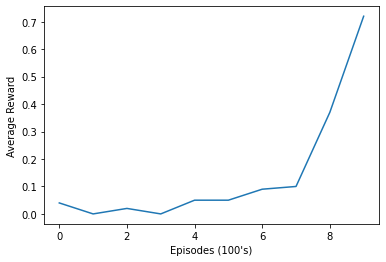

In [ ]:
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('Average Reward')
plt.xlabel('Episodes (100\'s)')
plt.show()